# Metropolis Hastings Algorithm
In this notebook we demonstrate MCMC method of sampling, i.e., the Metropolis Hastings Algorithm.

In [1]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# Target distribution as given in the question
# P(x) = exp(-x^4) * (2 + sin(5x) + sin(-2x^2))
def target_distribution_approx(x):
    return np.exp(-x ** 4) * (2 + np.sin(5 * x) + np.sin(-2 * (x ** 2)))

In [3]:
# Function to generate the next sample using Metropolis-Hastings algorithm using normal distribution as proposal distribution
# xt: Current sample (Mean of the proposal distribution), sigma: Standard deviation of the proposal distribution
def generate_next_sample(xt, sigma):
    # Generating the candidate sample using normal distribution with mean xt and standard deviation sigma
    xcand = np.random.normal(loc = xt, scale = sigma)
    
    # Calculating the acceptance probability using the formula discussed in the class
    probability = (norm.pdf(xt, loc = xcand, scale = sigma) / norm.pdf(xcand, loc = xt, scale = sigma))
    probability = probability * (target_distribution_approx(xcand) / target_distribution_approx(xt))
    accept_probability = min(1, probability)
    
    # Generating a random number between 0 and 1 to decide whether to accept the candidate sample or not
    u = np.random.rand()
    # If the random number is less than the acceptance probability, accept the candidate sample
    if u < accept_probability:
        return xcand
    # Else, reject the candidate sample and return the current sample
    else:
        return xt

In [4]:
# Function to generate the samples using Metropolis-Hastings algorithm
# x0: Initial sample, sigma: Standard deviation of the proposal distribution, num_samples: Number of samples to generate
def metropolis_hastings_generate_samples(x0, sigma=1, num_samples=1500):
    samples = np.empty(num_samples)
    samples[0] = x0
    # Generating the samples using the generate_next_sample function
    for i in range(1, num_samples):
        samples[i] = generate_next_sample(samples[i - 1], sigma)
    # Returning the generated samples
    return samples

In [5]:
# Sample generation for different values of sigma and x0 = -1
# sigma = 0.05
low_samples = metropolis_hastings_generate_samples(-1, 0.05, 1500)

# sigma = 1
medium_samples = metropolis_hastings_generate_samples(-1, 1, 1500)

# sigma = 50
high_samples = metropolis_hastings_generate_samples(-1, 50, 1500)

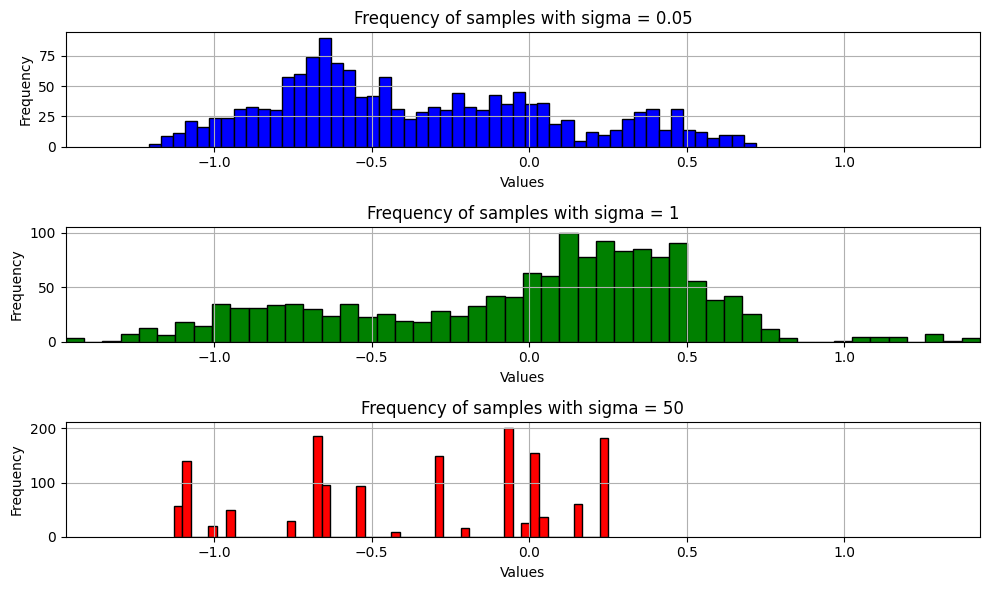

In [6]:
# Plotting the samples generated for different values of sigma

# Setting the common range for the x-axis for all the plots
max_value = max(np.max(low_samples), np.max(medium_samples), np.max(high_samples))
min_value = min(np.min(low_samples), np.min(medium_samples), np.min(high_samples))

bins = 50

# Set figure size
plt.figure(figsize = (10, 6))

# 3 subplots for the samples generated for different values of sigma
# Plot for sigma = 0.05
plt.subplot(3, 1, 1)
plt.hist(low_samples, bins = bins, color = 'blue', edgecolor = 'black')
plt.title('Frequency of samples with sigma = 0.05')
plt.xlabel('Values')
plt.xlim(min_value, max_value) # Setting the common range for the x-axis for all the plots
plt.ylabel('Frequency')
plt.grid(True)

# Plot for sigma = 1
plt.subplot(3, 1, 2)
plt.hist(medium_samples, bins = bins, color = 'green', edgecolor = 'black')
plt.title('Frequency of samples with sigma = 1')
plt.xlabel('Values')
plt.xlim(min_value, max_value) # Setting the common range for the x-axis for all the plots
plt.ylabel('Frequency')
plt.grid(True)

# Plot for sigma = 50
plt.subplot(3, 1, 3)
plt.hist(high_samples, bins = bins, color = 'red', edgecolor = 'black')
plt.title('Frequency of samples with sigma = 50')
plt.xlabel('Values')
plt.xlim(min_value, max_value) # Setting the common range for the x-axis for all the plots
plt.ylabel('Frequency')
plt.grid(True)

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()

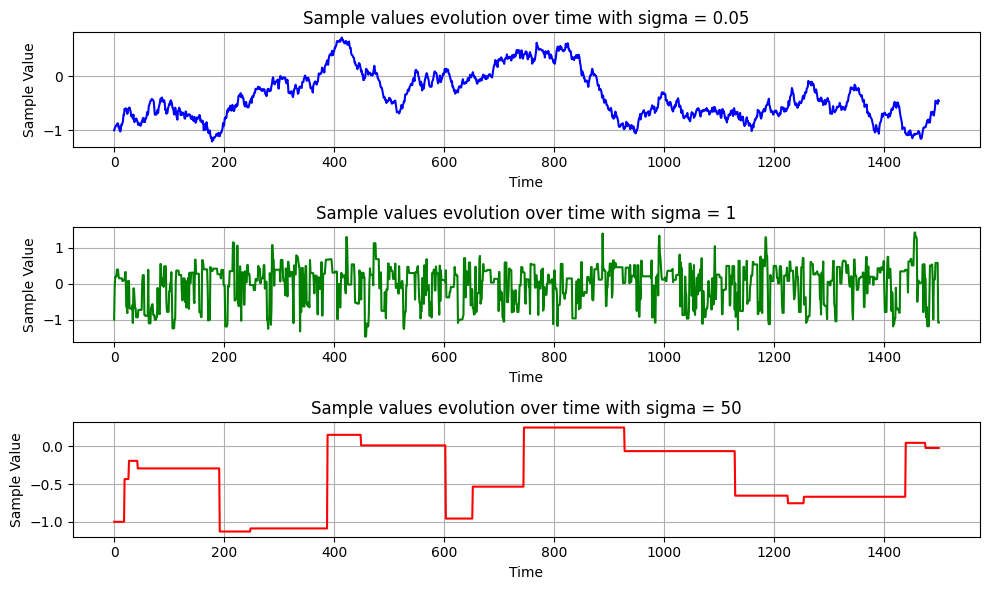

In [7]:
# Plotting the sample values evolution over time for different values of sigma
# Time indices for the samples
indices = np.arange(0, 1500, 1)

# Set figure size
plt.figure(figsize=(10, 6))

# 3 subplots for the sample values evolution over time for different values of sigma
# Plot for sigma = 0.05
plt.subplot(3, 1, 1)
plt.plot(indices, low_samples, color = 'blue')
plt.title('Sample values evolution over time with sigma = 0.05')
plt.xlabel('Time')
plt.ylabel('Sample Value')
plt.grid(True)

# Plot for sigma = 1
plt.subplot(3, 1, 2)
plt.plot(indices, medium_samples, color='green')
plt.title('Sample values evolution over time with sigma = 1')
plt.xlabel('Time')
plt.ylabel('Sample Value')
plt.grid(True)

# Plot for sigma = 50
plt.subplot(3, 1, 3)
plt.plot(indices, high_samples, color='red')
plt.title('Sample values evolution over time with sigma = 50')
plt.xlabel('Time')
plt.ylabel('Sample Value')
plt.grid(True)

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()